# Data Preparation

## Load data from sqlite3 in json

In [2]:
# import sys
# from pathlib import Path
# sys.path.append("C:\\codes\\causality_study_phd\\")
from utils.db.get_data_db import get_data_json, get_d_options
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
sns.set()

import warnings
warnings.filterwarnings('ignore')

db_file_path = 'data/study_02.db'
data = get_data_json(db_file_path)

# dict: {<d_id>, List of available options per demo question}
d_options = get_d_options(db_file_path)
## palette
p = {'AG':'blue','IG':'magenta','SG':'#32CD32'}

## Data cleaning 

In [2]:
data_processed = {}
for p in data:
    if data[p]['status'] == "end" or data[  p]['status'] == "end_thanks":
        data_processed[p] = data[p]

## Get Answers to Demographic Questions

D1: What is your age?

D2: What is the highest level of education you have completed?

D3: What former training in statistics have you undertaken?

D4: Could you confidently state the difference between correlation and causation?

D5: Are you aware of having any color vision deficiency?

# Visualize Demographics

In [3]:
# demographic questions ids
d_ids = ['d1','d2','d3','d4','d5']
d_questions = {"d1":"D1: What is your age?",
               "d2":"D2: What is the highest level of education \n you have completed?",
               "d3":"D3: What former training in Statistics \n have you undertaken?",
               "d4":"D4: Could you confidently state \n the difference between \n correlation and causation?",
               "d5":"D5: Are you aware of \n having any color \n vision deficiency?"}

## get participants responses in IG  
demo_answers = {}
demo_answers["answer"] = []
demo_answers['condition']  = []
demo_answers['question'] = [] 
for d in d_ids:
    answ = [p_details['d_answers'][d]['option'] 
            for p,p_details in data_processed.items() 
            if p_details['mode'] == 'i' ]
    demo_answers["answer"].extend( answ)
    demo_answers["question"].extend([d_questions[d]]*len(answ))
    demo_answers['condition'].extend(['IG']*len(answ))

## get participants responses in SG    
for d in d_ids:
    answ = [p_details['d_answers'][d]['option'] 
            for p,p_details in data_processed.items() 
            if p_details['mode'] == 's' ]
    demo_answers["answer"].extend( answ)
    demo_answers["question"].extend([d_questions[d]]*len(answ))
    demo_answers['condition'].extend(['SG']*len(answ))
    
## get participants responses in AG  
for d in d_ids:
    answ = [p_details['d_answers'][d]['option'] 
            for p,p_details in data_processed.items() 
            if p_details['mode'] == 'a' ]
    demo_answers["answer"].extend( answ)
    demo_answers["question"].extend([d_questions[d]]*len(answ))
    demo_answers['condition'].extend(['AG']*len(answ))

df = pd.DataFrame(demo_answers)

# # add line breaks to long answer options
df['answer'] = df['answer'].replace(['A-levels or equivalent'],'A-levels or\n equivalent')
df['answer'] = df['answer'].replace(['Postgraduate degree in Statistics',"University degree in Statistics"],['Postgrad. degree\n in Statistics','Univ. degree\n in Statistics'])

def tm_sorter(column):
    """Sort function"""
    sorter = ['18-25','26-40', '41-65','A-levels or\n equivalent',"Bachelor's degree",
                       "Master's degree","Doctoral degree",'None','School','Some University','Univ. degree\n in Statistics',
                       'Postgrad. degree\n in Statistics', 'Definetely no','Probably no','Probably yes','Definetely yes', 'No']
    correspondence = {s: order for order, s in enumerate(sorter)}
    return column.map(correspondence)

df = df.sort_values(by='answer', key=tm_sorter)
df = df.sort_values(by='condition')

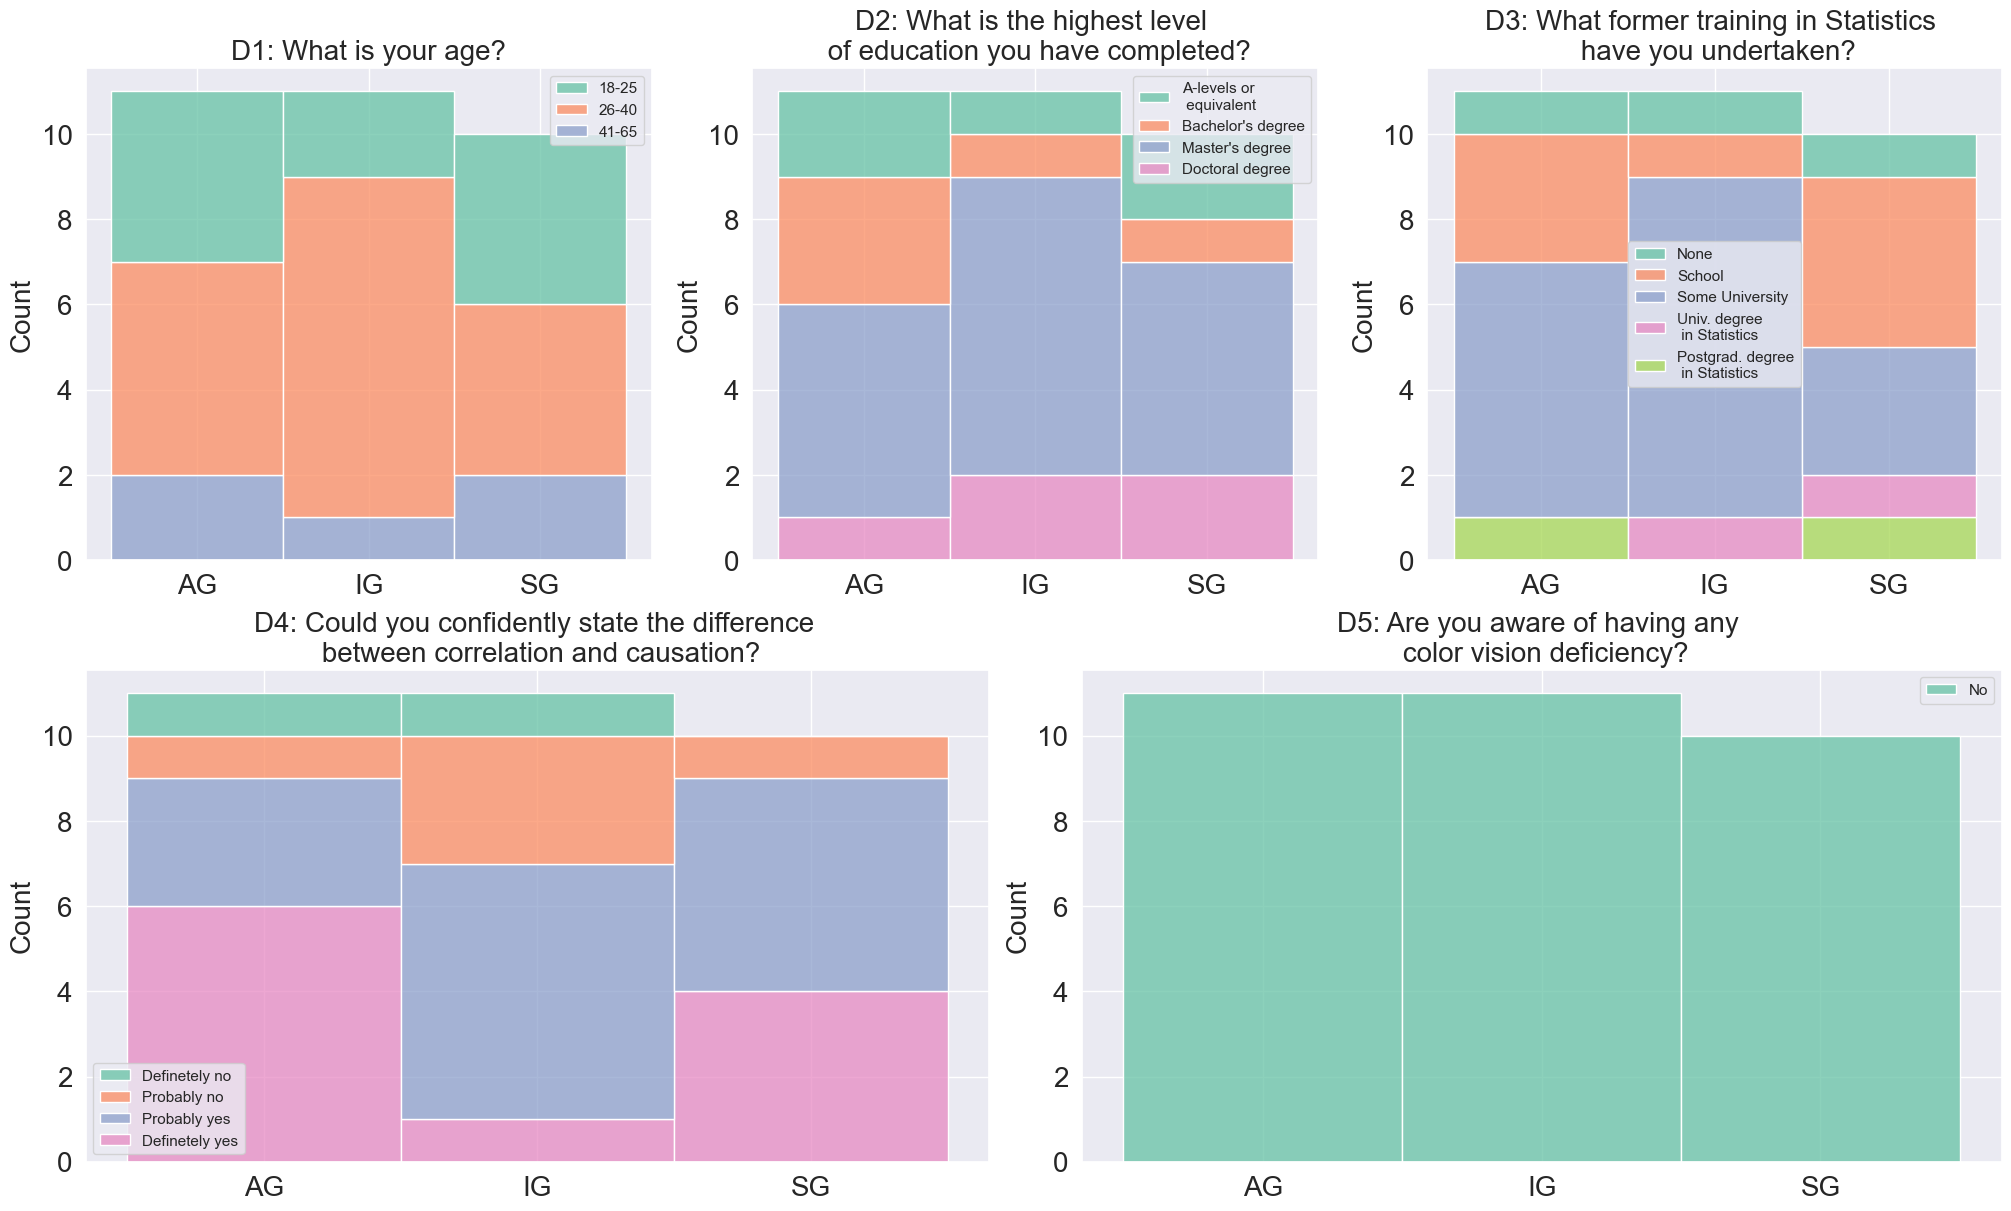

In [4]:
## Plot in common figure
fig = plt.figure(constrained_layout=True,figsize=(20, 12))
font_size = 20
plt.rcParams.update({'font.size': font_size,"font.weight": "bold"})
gs = GridSpec(2, 6, figure=fig)
ax1 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[0, 2:4])
ax3 = fig.add_subplot(gs[0, 4:6])
ax4 = fig.add_subplot(gs[1, 0:3])
ax5 = fig.add_subplot(gs[1, 3:6])

g1 = sns.histplot(ax=ax1, data = df[df['question'] == 'D1: What is your age?'], x = "condition", hue = "answer", multiple='stack', stat='count', 
                  palette = sns.color_palette("Set2"), 
                  hue_order = ['18-25','26-40', '41-65'])
g1.legend_.set_title(None)
ax1.set_title("D1: What is your age?")
ax1.tick_params(axis='both')

g2 = sns.histplot(ax=ax2, data = df[df['question'] == 'D2: What is the highest level of education \n you have completed?'], x = "condition", hue = "answer", multiple='stack', 
                  stat='count', 
                  palette = sns.color_palette("Set2"),
                 hue_order = ['A-levels or\n equivalent',"Bachelor's degree", "Master's degree","Doctoral degree"])
g2.legend_.set_title(None)
ax2.set_title("D2: What is the highest level \n of education you have completed?")
ax2.tick_params(axis='both')


g3 = sns.histplot(ax=ax3, data = df[df['question'] == 'D3: What former training in Statistics \n have you undertaken?'], x = "condition", hue = "answer", multiple='stack', 
                  stat='count', 
                  palette = sns.color_palette("Set2"),
                 hue_order = ['None','School','Some University','Univ. degree\n in Statistics','Postgrad. degree\n in Statistics'])
g3.legend_.set_title(None)
ax3.set_title("D3: What former training in Statistics \n have you undertaken?")
ax3.tick_params(axis='both')

g4 = sns.histplot(ax=ax4, data = df[df['question'] == 'D4: Could you confidently state \n the difference between \n correlation and causation?'], x = "condition", hue = "answer", 
                  multiple='stack', stat='count', 
                  palette = sns.color_palette("Set2"),
                 hue_order = ['Definetely no','Probably no','Probably yes','Definetely yes'])
g4.legend_.set_title(None)
ax4.set_title("D4: Could you confidently state the difference \n between correlation and causation?")
ax4.tick_params(axis='both')

g5 = sns.histplot(ax=ax5, data = df[df['question'] == 'D5: Are you aware of \n having any color \n vision deficiency?'], x = "condition", hue = "answer", multiple='stack', 
                  stat='count', 
                  palette = sns.color_palette("Set2"))
g5.legend_.set_title(None)
ax5.set_title("D5: Are you aware of having any \n color vision deficiency?")
ax5.tick_params(axis='both')

g_axes = [ax1,ax2,ax3,ax4,ax5]
for i,ax in enumerate(g_axes):
    ax.tick_params(axis='both', labelsize=font_size)
    ax.yaxis.label.set_size(font_size)
    ax.title.set_size(font_size)
    # if i==0:
    # ax.legend(loc=2, prop={'size': font_size-4})

ax1.set(xlabel=None)
ax2.set(xlabel=None)
ax3.set(xlabel=None)
ax4.set(xlabel=None)
ax5.set(xlabel=None)

plt.savefig('ch6_Fig8.pdf',dpi=300)